In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import tensorflow as tf
import keras
from PIL import Image
tf.random.set_seed(3)
from keras.datasets import mnist
from tensorflow.math import confusion_matrix


In [25]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [26]:
X_train.shape, X_test

((60000, 28, 28),
 array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0,

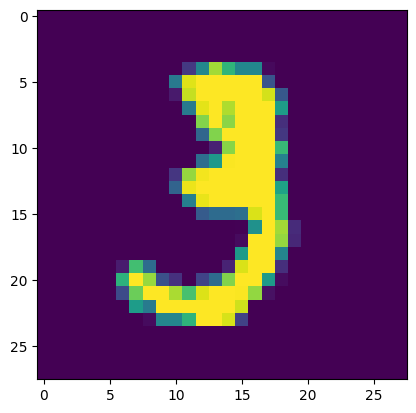

In [27]:
plt.imshow(X_train[10])

In [28]:
np.unique(y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [29]:
##scaling
X_train = X_train/255
X_test = X_test/255

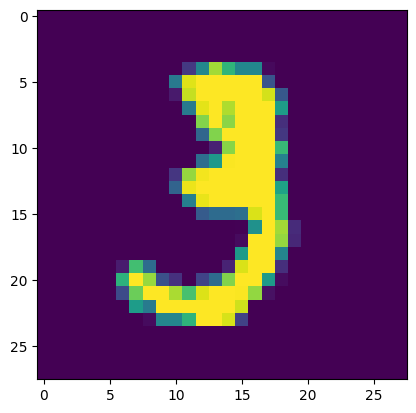

In [38]:
plt.imshow(X_train[10])

In [155]:
## ANN
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
])

f:\deep learning\myenv1\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [156]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [157]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8527 - loss: 0.5073
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9552 - loss: 0.1512
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9670 - loss: 0.1074
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9736 - loss: 0.0850
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9798 - loss: 0.0687
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9822 - loss: 0.0573
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9853 - loss: 0.0478
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9884 - loss: 0.0396
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9900 - loss: 0.0343
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9912 - loss: 0.0305


In [158]:
loss, accuracy= model.evaluate(X_test, y_test,  )

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9683 - loss: 0.1231


In [159]:
y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [160]:
predictions = [np.argmax(i) for i in y_pred]

In [161]:
predictions

[np.int64(7),
 np.int64(2),
 np.int64(1),
 np.int64(0),
 np.int64(4),
 np.int64(1),
 np.int64(4),
 np.int64(9),
 np.int64(5),
 np.int64(9),
 np.int64(0),
 np.int64(6),
 np.int64(9),
 np.int64(0),
 np.int64(1),
 np.int64(5),
 np.int64(9),
 np.int64(7),
 np.int64(3),
 np.int64(4),
 np.int64(9),
 np.int64(6),
 np.int64(6),
 np.int64(5),
 np.int64(4),
 np.int64(0),
 np.int64(7),
 np.int64(4),
 np.int64(0),
 np.int64(1),
 np.int64(3),
 np.int64(1),
 np.int64(3),
 np.int64(4),
 np.int64(7),
 np.int64(2),
 np.int64(7),
 np.int64(1),
 np.int64(2),
 np.int64(1),
 np.int64(1),
 np.int64(7),
 np.int64(4),
 np.int64(2),
 np.int64(3),
 np.int64(5),
 np.int64(1),
 np.int64(2),
 np.int64(4),
 np.int64(4),
 np.int64(6),
 np.int64(3),
 np.int64(5),
 np.int64(5),
 np.int64(6),
 np.int64(0),
 np.int64(4),
 np.int64(1),
 np.int64(9),
 np.int64(5),
 np.int64(7),
 np.int64(8),
 np.int64(9),
 np.int64(3),
 np.int64(7),
 np.int64(4),
 np.int64(6),
 np.int64(4),
 np.int64(3),
 np.int64(0),
 np.int64(7),
 np.in

In [162]:
predictions=np.array(predictions)
predictions

array([7, 2, 1, ..., 4, 5, 6])

In [163]:
conf_mat = confusion_matrix(y_test, predictions)
conf_mat

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    2,    2,    2,    1,    2,    1,    2,    7],
       [   0, 1114,    3,    3,    3,    0,    5,    2,    5,    0],
       [   4,    1,  996,    6,    3,    0,    5,    4,   13,    0],
       [   0,    0,    0,  995,    0,    0,    0,    5,    4,    6],
       [   0,    0,    2,    0,  963,    0,    5,    1,    1,   10],
       [   2,    0,    1,   26,    0,  846,    6,    2,    4,    5],
       [   7,    2,    0,    1,    2,    5,  940,    0,    1,    0],
       [   2,    3,   10,    4,    1,    0,    1,  977,    2,   28],
       [   3,    0,    3,    9,    5,    4,    4,    3,  938,    5],
       [   1,    3,    0,    4,   12,    3,    1,    0,    2,  983]],
      dtype=int32)>

<Axes: >

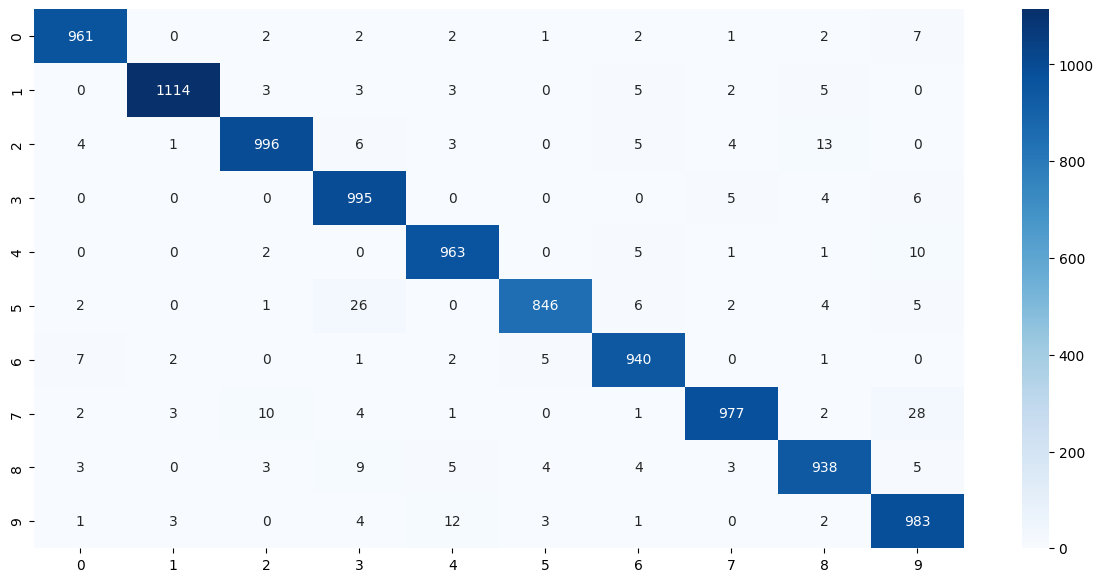

In [164]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt= 'd', cmap='Blues')

In [210]:
img_path = '5img.jpg'

In [211]:
input_imj = cv2.imread(img_path)

In [212]:
type(input_imj)

numpy.ndarray

In [213]:
input_imj.shape

(72, 71, 3)

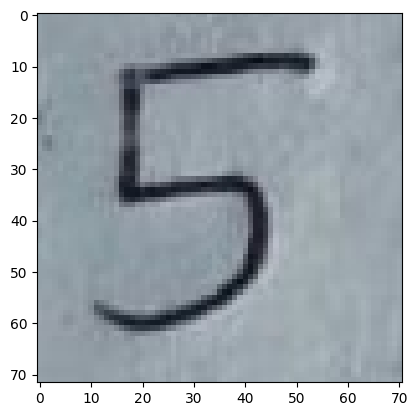

In [214]:
plt.imshow(input_imj)

In [215]:
greyscale = cv2.cvtColor(input_imj, cv2.COLOR_RGB2GRAY)

In [216]:
greyscale.shape

(72, 71)

In [217]:
input_resize = cv2.resize(greyscale,(28,28))

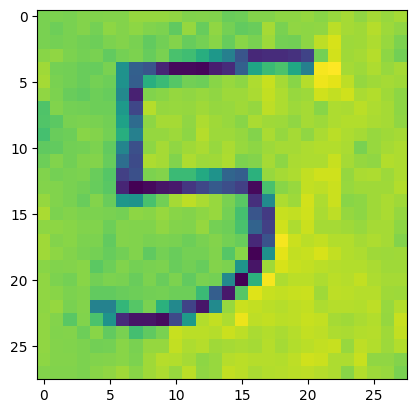

In [218]:
plt.imshow(input_resize)

In [219]:
input_resize = input_resize/255

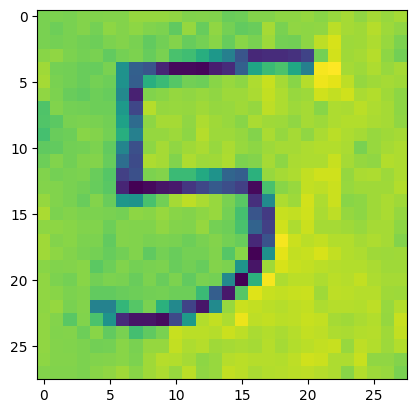

In [220]:
plt.imshow(input_resize)

In [221]:
input_reshape = np.reshape(input_resize, [1,28,28])

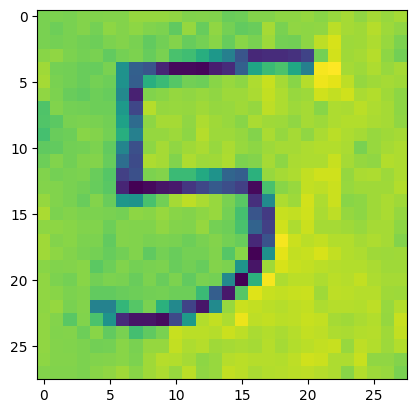

In [222]:
plt.imshow(input_reshape[0])

In [223]:
prediction = model.predict(input_reshape)
prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


array([[5.26643423e-16, 6.64069385e-20, 1.58844188e-07, 4.53621125e-12,
        1.10333036e-34, 9.99999881e-01, 9.71666414e-10, 1.04951224e-13,
        1.75019242e-17, 1.44462344e-20]], dtype=float32)

In [224]:
np.argmax(prediction)

np.int64(5)